In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
%matplotlib inline

## Leitura dos dados
- Dados de notificações de todo o país - 2007 a 2019
- Dados atualizados em 15/09/2020, de acordo com metadados fornecidos pelo SINAN no momento do download.
    - Instruções em `../data/README.md`

In [38]:
path_leivis = '../data/interim/leivis'
path_dicionario = '../data/dicionario.csv'

df = pd.read_csv(f'{path_leivis}/interim_leivis.csv', low_memory=False).drop('Unnamed: 0', axis=1)

mn = pd.read_csv('../data/processed/municipios.csv')
mun_pa = mn.loc[mn.estado == 'Pará', ['ibge_code', 'municipio']].set_index('ibge_code').to_dict()['municipio']

# dicionário dos dados: para facilitar consulta apenas
dic = pd.read_csv(path_dicionario, sep='\t')
dic.columns = ['id', 'tipo', 'categorias', 'descricao', 'caracteristicas', 'dbf']
cols = list(set(dic.dbf).intersection(set(df.columns)))
dic = dic.set_index('dbf')
dic = dic.loc[cols, ['categorias', 'descricao', 'caracteristicas']]

In [39]:
display(df.columns)
print(f'Consumo de memória em MB: {round(df.memory_usage(deep=True).sum() / (1024*1024), 2)} MB')
print(f'tamanho original da base: {df.shape}')



Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
       'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
       'FRAQUEZA', 'EDEMA', 'EMAGRA', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
       'DIAG_PAR_N', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
       'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA', 'EVOLUCAO',
       'DT_OBITO', 'DT_ENCERRA', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
       'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
       'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
       'CO_PAIS_3', 'DS_TRANS_3'],
      

Consumo de memória em MB: 135.76 MB
tamanho original da base: (113048, 75)


## Visualizando a descrição dos dados junto com o dicionário 
corra as células para ver descrição das variáveis

In [4]:
# do tipo objeto
pd.concat([
    df.describe(include='object').T, dic.loc[df.describe(include='object').T.index, :]
], axis=1
)

,count,unique,top,freq,categorias,descricao,caracteristicas
ID_AGRAVO,113048,1,B550,113048,B55.0 – Leishmaniose Visceral,Agravo/doença,NaN
DT_NOTIFIC,113048,4727,2019-09-05,144,NaN,Data da Notificação: data e hora,NaN
DT_SIN_PRI,113048,5060,2019-09-05,114,NaN,Data dos Primeiros Sintomas,NaN
DT_NASC,112021,29090,2006-06-29,23,NaN,Data de Nascimento do Paciente,NaN
CS_SEXO,113048,3,M,68665,\nM - Masculino\nF - Feminino\nI - Ignorado\n,Sexo do paciente,NaN
DT_INVEST,91611,4056,2019-09-05,142,NaN,Data em que ocorreu a investigação – informar a data da 1a visita ao paciente,Campo obrigatório\nData da investigação > ou = data\nda notificação
ID_OCUPA_N,37203,1323,999991.0,7011,NaN,"Informar a atividade exercida pelo paciente\nno setor formal, informal\nou autônomo ou sua última atividade exercida\nquando paciente for desempregado. O ramo\nde atividade econômica do paciente refere-se as\natividades econômicas desenvolvidas nos\nprocessos de produção do setor primário\n(agricultura e extrativismo); secundário\n(indústria) ou terciário\n(serviços e comércio)",NaN
OUTROS_ESP,22302,7966,DOR ABDOMINAL,1554,NaN,Especificar outros sinais\ne sintomas que o\npaciente apresenta,Campo essencial. Se campo\nSinais e Sintomas(Outros)=1\n(sim).
TRATAMENTO,33101,3614,2018-03-23,28,NaN,Informar a data do início do tratamento,Campo essencial\nData deve ser >= a data da\nnotificação
DT_OBITO,5253,2590,2017-05-08,9,NaN,Informar a data do\nÓbito,Campo Obrigatório se\ncampo Evolução do\nCaso = 3 ou 4 (óbito)\nData do Óbito deve ser\nmaior ou igual à Data\ndos Primeiros Sintomas\nCampo habilitado se\ncampo Evolução= 3-\nÓbito por LV ou 4-Óbito\npor outras causas.\n


In [5]:
# do tipo numérico
pd.concat([
    df.describe().loc[['count', 'mean', 'std', 'min', 'max'], :].T, dic.loc[df.describe().T.index, :]
], axis=1
)

,count,mean,std,min,max,categorias,descricao,caracteristicas
TP_NOT,113048.0,2.000000,0.000000,2.0,2.0,2 – Individual,Tipo da notificação,NaN
SEM_NOT,113048.0,200979.397619,8961.843704,814.0,202001.0,NaN,Semanas do calendário\nEpidemiológico\npadronizado.Semana epidemiológica que o caso\nfoi notificado.,NaN
NU_ANO,113048.0,2013.548236,3.626065,2007.0,2019.0,NaN,NaN,NaN
SG_UF_NOT,113048.0,26.112359,9.841576,11.0,53.0,NaN,Sigla da UF de Notificação,NaN
ID_MUNICIP,113048.0,262271.067591,98639.842430,110004.0,530010.0,NaN,Id do município de Notificação (código IBGE),NaN
ID_REGIONA,87890.0,1586.618671,525.948616,1331.0,6256.0,Campo com código da regional de saúde da tabela de município do sistema,Regional de saúde onde está localizado o município da unidade de saúde ou outra fonte notificadora,NaN
SEM_PRI,113048.0,200904.635783,9610.696029,644.0,202001.0,Semana epidemiológica dos\nprimeiros sintomas/ diagnósticos.\n(campo interno),\nSemanas do calendário\nepidemiológico padronizado. Semana epidemiológica dos números\nsintomas.,NaN
NU_IDADE_N,113048.0,3943.405438,306.385625,5.0,4120.0,NaN,NaN,NaN
CS_GESTANT,113047.0,5.894389,0.625039,1.0,9.0,1-1oTrimestre\n2-2oTrimestre\n3-3oTrimestre\n4- Idade gestacional Ignorada\n5-Não\n6- Não se aplica\n9-Ignorado\n,Se paciente é gestante,NaN
CS_RACA,110318.0,3.671903,1.825504,1.0,9.0,\n1-Branca\n4-Parda\n2-Preta\n3-Amarela\n5-Indígena \n9- Ignorado,Raça/Cor,NaN


## Atualizando os nomes das colunas

In [40]:
df.columns = ['TP_NOT', 'ID_AGRAVO', 'DT_NOT', 'SEMANA_NOT', 'ANO', 'CO_UF_NOT',
               'CO_MN_NOT', 'ID_REGIONA', 'DT_PRI_SIN', 'SEMANA_PRI_SIN', 'DT_NASC',
               'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_UF_RESI',
               'CO_MN_RESI', 'ID_RG_RESI', 'CO_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
               'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
               'FRAQUEZA', 'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
               'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
               'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
               'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
               'CO_UF_INF', 'CO_PAIS_INF', 'CO_MN_INF', 'DOENCA_TRABALHO', 'EVOLUCAO',
               'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
               'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
               'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
               'CO_PAIS_3', 'DS_TRANS_3'
              ]
ufs = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 22: 'PI', 23: 'CE',
    24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS', 50: 'MT', 51: 'MS', 52: 'GO', 53: 'DF'
}

## Imputa ou Corrige os Campos de UF

Ex.:
- campo UF_INF está vazio, mas o campo MN_INF está presente. A partir deste é possível extrair o estado e preencher o campo vazio.
- se o codigo do município de notificação começa com 15, por exemplo, significa que a uf de notificação também tem que ser 15. Este código testa isso e faz correção. 
#### Qual impacto?
> Pouco. Para o indicador de incidência os dados são agregados por município de infecção. Mas se em algum momento alguma seleção, verificação nos dados for realizada pelo código da UF poderá ter resultado distorcido.
>
>- CO_UF_NOT de acordo com CO_MN_NOT
>- CO_UF_RESI de acordo com CO_MN_RESI
>- CO_UF_INF de acordo com CO_MN_INF
>
> No Pará somente um registro foi identificado. Município de residência é Tomé-Açu-PA e uf de residência é Pernambuco (26).

In [41]:
def fix_co_uf(uf):  
    c_resi = (df.CO_MN_RESI.astype('string').str.startswith(str(uf)) & (df.CO_UF_RESI != uf))
    c_not = (df.CO_MN_NOT.astype('string').str.startswith(str(uf)) & (df.CO_UF_NOT != uf))
    c_inf = (df.CO_MN_INF.astype('string').str.startswith(str(uf)) & (df.CO_UF_INF != uf))
    
    if df.loc[c_resi, :].shape[0] > 0:
        print(f"CO_UF_RESI: {uf}; shape: {df.loc[c_resi, :].shape}")
        df.loc[c_resi, 'CO_UF_RESI'] = uf
        
    if df.loc[c_not, :].shape[0] > 0:
        print(f"CO_UF_NOT: {uf}; shape: {c_not, :].shape}")
        df.loc[c_not, 'CO_UF_NOT'] = uf
        
    if df.loc[c_inf, :].shape[0] > 0:
        print(f"CO_UF_INF: {uf}; shape: {df.loc[c_inf, :].shape}")
        df.loc[c_inf, 'CO_UF_INF'] = uf  
        

for it in set(
    np.concatenate((
        df.CO_UF_INF.dropna().unique(),
        df.CO_UF_RESI.dropna().unique(),
        df.CO_UF_NOT.dropna().unique()
    ))
):
    fix_co_uf(int(it))

CO_UF_RESI: 15; shape: (1, 75)
CO_UF_INF: 21; shape: (1, 75)
CO_UF_INF: 26; shape: (2, 75)
CO_UF_INF: 29; shape: (2, 75)
CO_UF_INF: 51; shape: (1, 75)
CO_UF_INF: 52; shape: (1, 75)


## Excluindo duplicidades: de acordo com coluna `NDUPLIC_N`
- se 0 ou branco: não identificado
- se igual a 2.0, é duplicidade
- se igual a 1.0, não é duplicidade
segundo o dicionário de dados

> nenhum registro dos duplicados tem município de infecção no Pará.

In [96]:
print('Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

print(f'{(df.NDUPLIC_N == 2).sum()} registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.')
temp = df.loc[
    (df.NDUPLIC_N == 2), 'CO_UF_INF'
].value_counts(dropna=False)
temp.index = temp.index.map(ufs)
display(temp.to_frame('UF_INF dos duplicados x total').T)

df.drop(df.loc[df.NDUPLIC_N == 2, :].index, axis=0, inplace=True)

print('Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,41011,2155,701,777,708
Pará,2060,49,27,63,1


0 registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.


""
UF_INF dos duplicados x total


Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,41011,2155,701,777,708
Pará,2060,49,27,63,1


__Total de municípios ignorados (terminados em 0000) por estado.
Eles não vão entrar no cálculo do indicador, porque não é possível saber qual o município de infecção.__
- Pará não possui caso com município de infecção ignorado. Não afeta.

In [98]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.CO_MN_INF.astype('string').str.contains('0000')), 
    'CO_UF_INF'
].value_counts()
temp.index = temp.index.map(ufs)
temp.to_frame('total municípios Inf. ignorados ').T

,BA,MG,TO,MA,MS,CE,PB,RJ,PR,GO,PI,SP
total municípios Inf. ignorados,8,6,4,4,2,2,2,1,1,1,1,1


__Esta será a única amostra removida do Pará: é caso novo sem CO_MN_INF__

In [120]:
df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15) & (df.CO_MN_INF.isnull()), :]

,TP_NOT,ID_AGRAVO,DT_NOT,SEMANA_NOT,ANO,CO_UF_NOT,CO_MN_NOT,ID_REGIONA,DT_PRI_SIN,SEMANA_PRI_SIN,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,CO_UF_RESI,CO_MN_RESI,ID_RG_RESI,CO_PAIS,NDUPLIC_N,CS_FLXRET,FLXRECEBI,MIGRADO_W,DT_INVEST,ID_OCUPA_N,FEBRE,FRAQUEZA,EDEMA,EMAGRECIMENTO,TOSSE,PALIDEZ,BACO,INFECCIOSO,FEN_HEMORR,FIGADO,ICTERICIA,OUTROS,OUTROS_ESP,HIV,DIAG_PARASITOLOGICO,IFI,OUTRO,ENTRADA,TRATAMENTO,DROGA,PESO,DOSE,AMPOLAS,FALENCIA,CLASSI_FIN,CRITERIO,TPAUTOCTO,CO_UF_INF,CO_PAIS_INF,CO_MN_INF,DOENCA_TRABALHO,EVOLUCAO,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DS_MUN_1,CO_UF_1,CO_PAIS_1,DS_TRANS_1,DT_DESLC2,DS_MUN_2,CO_UF_2,CO_PAIS_2,DS_TRANS_2,DT_DESLC3,DS_MUN_3,CO_UF_3,CO_PAIS_3,DS_TRANS_3
50507,2,B550,2017-08-28,201735,2017,15,150277,1494.0,2017-08-15,201733,1933-09-08,4083,M,6.0,4.0,0.0,15,150277,1494.0,1.0,NaN,NaN,NaN,NaN,2017-08-28,NaN,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,INAPETENCIA/LOMBALGIA,1.0,3.0,1.0,1.0,1.0,2017-09-01,4.0,0.0,NaN,0.0,NaN,1.0,1.0,2.0,15.0,1,NaN,2.0,1.0,NaN,2017-10-30,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


Total de casos confirmados dos municípios, por local de infecção. Top 25


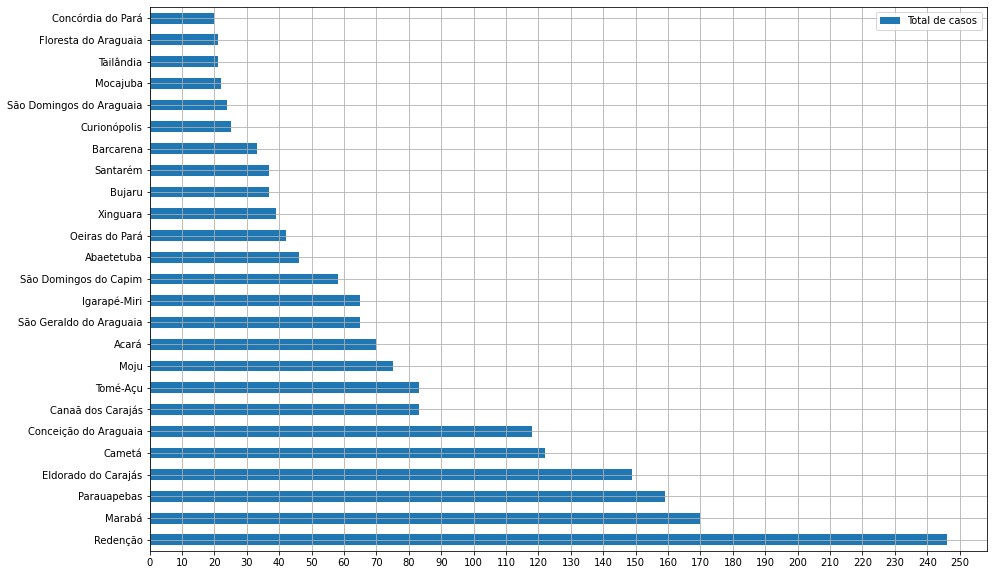

In [114]:
print('Total de casos confirmados dos municípios, por local de infecção. Top 25')
temp = df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'CO_MN_INF'].value_counts(dropna=False)
temp.name = 'Total de casos'
temp.index = temp.index.map(mun_pa)

temp.to_frame().head(25).plot(kind='barh', figsize=(15,10), grid=True, xticks=range(0, temp.max() + 10, 10));

## Pará

In [124]:
c_para = (
    (df.CLASSI_FIN == 1) & 
    (df.CO_UF_INF == 15) & 
    (~df.CO_MN_INF.isnull()) & 
    (df.ENTRADA == 1)
)
para = df.loc[c_para, :].copy()

## Casos `novos` e `recidivas`

Tem vários testes de consistência a serem feitos, mas o mais essencial é definir uma parcela de dados o mais confiável possível para analisar.

Campos importantes: 
Alguns campos são importantes para cálculo de alguns indicadores, entretanto há valores faltantes que limitam os dados para cálculo.

- `ENTRADA` se o caso é novo ou rescidiva.
- `CO_MN_INF`, `CO_UF_INF` (local de infecção)
- `CO_MN_RESI`, `CO_UF_RESI` (local residencia)

Nenhuma amostra foi excluída, apenas os 43 registros supostamente duplicados, indicados pela coluna `NDUPLIC_N`.


***


`ENTRADA`

Questionamento: o que significa o valor transferência (3), em `ENTRADA`?
Seria um caso notificado em um local e o tratamento transferido para outro local?
Neste caso faz-se outra notificação no local atual de tratamento e teríamos duas p/ msm caso?
Ou atualizam alguns campos da notificação original?
> De qualquer forma o caderno de cálculo de indicadores do SUS diz para considerar apenas casos novos e/ou recidivas no cálculo dos principais indicadores.

- 1: caso novo; 
- 2: recidiva; 
- 3: transferência; 
- 9: ignorado.

Por enquanto serão desconsideradas amostras com entrada diferente de 1 ou 2.

Obs.: abaixo temos dentre os 28 casos do Pará com Entrada=3 casos onde o município de notificação, residência e infecção são os mesmos. Então seria transferência de onde? 

In [14]:
print('total casos Brasil x Pará - campo ENTRADA')
display(
    pd.concat([
        df.ENTRADA.value_counts(dropna=False).to_frame('Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ],axis=1).T
)

total casos Brasil x Pará - campo ENTRADA


,1.0,2.0,3.0,9.0,NaN
Brasil,93282,2707,1104,9618,6294
Pará,2102,51,28,66,5


In [15]:
# ENTRADA=3 E UF_INF=Pará
df.loc[
    (df.ENTRADA == 3) & (df.CO_UF_INF == 15), 
    ['CO_UF_INF','CO_UF_RESI','CO_UF_NOT', 'CO_MN_INF','CO_MN_RESI','CO_MN_NOT', 'ANO', 'DT_NOT','ENTRADA']
].sort_values(by='CO_MN_NOT')

,CO_UF_INF,CO_UF_RESI,CO_UF_NOT,CO_MN_INF,CO_MN_RESI,CO_MN_NOT,ANO,DT_NOT,ENTRADA
12711,15.0,15,15,150520.0,150520,150140,2019,2019-01-30,3.0
13112,15.0,15,15,150812.0,150812,150140,2019,2019-05-18,3.0
111729,15.0,15,15,150550.0,150550,150140,2018,2018-06-20,3.0
13250,15.0,15,15,150470.0,150470,150140,2019,2019-06-03,3.0
13301,15.0,15,15,150020.0,150020,150140,2019,2019-06-07,3.0
13465,15.0,15,15,150020.0,150020,150140,2019,2019-07-29,3.0
54740,15.0,15,15,150800.0,150800,150140,2012,2012-11-19,3.0
54002,15.0,15,15,150010.0,150010,150140,2012,2012-07-26,3.0
111721,15.0,15,15,150157.0,150157,150157,2018,2018-12-21,3.0
61795,15.0,15,15,150178.0,150178,150178,2013,2013-03-06,3.0


In [16]:
df = df.loc[(df.ENTRADA == 1) | (df.ENTRADA == 2), :].copy()
print(f'shape BR após exclusão de 17.016 amostras com entrada diferente de 1 ou 2: {df.shape}')

print('\nTotal Brasil x Pará - CLASSI_FIN')
pd.concat([
    df.CLASSI_FIN.value_counts(dropna=False).to_frame(name='Brasil'),
    df.loc[df.CO_MN_INF.astype('string').str.startswith('15'), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
], axis=1).fillna(0).T

shape BR após exclusão de 17.016 amostras com entrada diferente de 1 ou 2: (95989, 75)

Total Brasil x Pará - CLASSI_FIN


,1.0,2.0,8.0,NaN
Brasil,43166.0,50843.0,920.0,1060.0
Pará,2108.0,0.0,26.0,18.0


## Dividindo os dados de acordo com a classificação final

### Verificação do campo CLASSI_FIN

- classificação final, CLASSI_FIN, é um campo condicional obrigatório
    - Se campo 35 (Diagnóstico parasitológico) ou 36 (Diagnóstico imunológico/IFI) ou 36 (Diagnóstico imunológico/outro) = 1: preencher automaticamente com 1 (confirmado).
    - Se todos os itens do campo 33 (Manifestações Clínicas) e 35 (Diagnóstico parasitológico) e 36 (Diagnóstico imunológico) = 2: preencher automaticamente com 2 (Descartado).
- 1 = confirmado; 
- 2 = descartado;
- 8 = ignorado.

Testar se há casos com CLASSI_FIN não atendendo aos critérios acima e imputar

> Este é um ponto delicado e que requer atenção, pois estamos supondo que o erro aconteceu no campo de classificação final e não no preenchimento dos outros campos.

***
### Qual o impacto no total de notificações do Pará se essas imputações forem feitas?

1) Imputar como 'CONFIRMADO': se o registro tiver algum dos exames como positivo (IFI, parasitológico ou outro) e a classificação final for diferente de 1, ou seja, estiver em branco, como ignorado (8) ou descartado (2), automaticamente atualizar para confirmado (1)
#### Conclusão:
> Dentre os que tem CLASSI_FIN igual a 2 e que deveriam ser 1:
>- CO_UF_INF: Pará como local provável de infecção ganha mais `0` registro.
>- CO_UF_NOT: Pará como local de notificação ganha mais `40` registros.
>- Co_UF_RESI: Pará como local de residência ganha mais `40` registros.

> Dentre os que tem CLASSI_FIN igual a branco ou nulo e que deveriam ser 1:
>- CO_UF_INF: Pará como local provável de infecção ganha mais `1` registro (município Altamira, 150060).
>- CO_UF_NOT: Pará como local de notificação ganha mais `3` registros.
>- Co_UF_RESI: Pará como local de residência ganha mais `4` registros.

   
2) Imputar como 'DESCARTADO': se todos os campos de sintomas (manifestações clínicas) forem negativos (2) e exames IFI e parasitológicos também forem negativos (2) e a classificação final for diferente de 2, ou seja, estiver em branco, como ignorado (8) ou como confirmado (1), automaticamente atualizar para descartado (2).
#### Conclusão:
> Dentre os que tem CLASSI_FIN igual a 1 e deveriam ser 2:
>- CO_UF_INF: Pará como local provável de infecção perde `0` registro.
>- CO_UF_NOT: Pará como local de notificação perde `0` registros.
>- Co_UF_RESI: Pará como local de residência perde `0` registros.

> Dentre os que tem CLASSI_FIN igual a branco ou nulo e deveriam ser 2:
>- CO_UF_INF: Pará como local provável de infecção perde `0` registro.
>- CO_UF_NOT: Pará como local de notificação perde `0` registros.
>- Co_UF_RESI: Pará como local de residência perde `0` registros.

- corrigir o campo `CLASSI_FIN` de acordo com a regra do dicionário de dados adiciona `1` caso a mais no indicador que considerar o local de infecção, `43` casos ao cálculo de indicador que considerar local de notificação e `44` no que considerar local de residência. 

Obs. 1: o indicador taxa de incidência pode utilziar o CO_UF_INF ou CO_UF_RESI: vamos utilizar o CO_UF_INF

Obs. 2: na tabela abaixo observe que dos registros recuperados como CONFIRMADOS poucos deles tem o campo CO_UF_INF, logo muitos deles serão descartados na hora de calcular o indicador que precisa deste campo. 

### De acordo com as regras acima:
- verificar dentre os que têm CLASSI_FIN = 1 que deveria ter CLASSI_FIN = 2
- verificar dentre os que têm CLASSI_FIN = 2 que deveria ter CLASSI_FIN = 1
- verificar dentre os que têm CLASSI_FIN = 8 ou branco (nulo) que deveria ter CLASSI_FIN = 1 ou 2

In [17]:
c_1 = ((df.IFI == 1) | (df.DIAG_PARASITOLOGICO == 1) | (df.OUTRO == 1))
c_2 = (
    (df.FEBRE == 2) & (df.FRAQUEZA == 2) & (df.EDEMA == 2) & 
    (df.EMAGRECIMENTO == 2) & (df.TOSSE == 2) & (df.PALIDEZ == 2) & (df.BACO == 2) & 
    (df.INFECCIOSO == 2) & (df.FEN_HEMORR == 2) & (df.FIGADO == 2) & (df.ICTERICIA == 2) & 
    (df.OUTROS == 2) & (df.DIAG_PARASITOLOGICO == 2) & (df.IFI == 2)
)

- Dentre os casos com CLASSI_FIN = 1 tem algum que deveria ser = 2? 
    - R. 1 apenas
- Tem algum com valor de UF = 15? 
    - R. nenhum

In [18]:
df.loc[(df.CLASSI_FIN == 1) & c_2, ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI']]

,CO_UF_INF,CO_UF_NOT,CO_UF_RESI,CO_MN_INF,CO_MN_NOT,CO_MN_RESI
34529,NaN,41,41,NaN,412250,412250


- Dentre os casos com CLASSI_FIN = 2 tem algum que deveria ser = 1?
    - 246 registros
- Tem algum com valor de UF = 15?
    - nenhum tem UF de infecção = 15. Não afeta indicador taxa de incidência.
    - dentre os 246, 40 deles tem uf de residência = PA e 40 têm uf de notificação = PA. 

obs.: nenhum deles tem CO_UF_INF, serão desconsiderados posteriormente.

In [19]:
print(
    df.loc[
        (df.CLASSI_FIN == 2) & c_1, 
        ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
    ].shape
)
descartado_que_e_confirmado = pd.DataFrame()
for it in ['CO_UF_RESI', 'CO_UF_INF', 'CO_UF_NOT']:
    descartado_que_e_confirmado = pd.concat([
        descartado_que_e_confirmado,
        df.loc[
            (df.CLASSI_FIN == 2) & c_1, 
            ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
        ].groupby(it)['ANO'].count().to_frame(name=f'{it}')
    ], axis=1).fillna(0)
descartado_que_e_confirmado.index = descartado_que_e_confirmado.index.map(ufs)
display(descartado_que_e_confirmado.T)


(246, 7)


,RO,AC,PA,TO,MA,PI,CE,PB,PE,SE,BA,MG,RJ,SP,PR,RS,MT,MS,GO,DF
CO_UF_RESI,1.0,1.0,40.0,41.0,13.0,4.0,11.0,1.0,2.0,2.0,10.0,69.0,4.0,17.0,1.0,1.0,8.0,11.0,3.0,6.0
CO_UF_INF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO_UF_NOT,1.0,1.0,40.0,41.0,12.0,5.0,11.0,1.0,2.0,2.0,9.0,69.0,4.0,17.0,1.0,1.0,8.0,11.0,1.0,9.0


- Dentre os casos com CLASSI_FIN nulo ou 8 tem algum que deveria ser 1 ou 2?
    - 266 seriam confirmados e 4, descartados.
- Tem algum com valor de UF = 15?
    - UF de infecção = 15: 1 apenas (município Altamira, 150060)
    - para residência aumentam 4 e notificação, 3.

In [20]:
print(
    f"""Confirmados: mais {
    df.loc[
        ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c_1, 
        ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
    ].shape[0]}\nDescartados: mais {
    df.loc[
        ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c_2, 
        ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
    ].shape[0]}"""
)

nulo_branco_que_e_confirmado = pd.DataFrame()
for it in ['CO_UF_RESI', 'CO_UF_INF', 'CO_UF_NOT']:
    nulo_branco_que_e_confirmado = pd.concat([
        nulo_branco_que_e_confirmado,
        df.loc[
            ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c_1, 
            ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
        ].groupby(it)['ANO'].count().to_frame(name=f'{it}')
    ], axis=1).fillna(0)
nulo_branco_que_e_confirmado.index = nulo_branco_que_e_confirmado.index.map(ufs)

print('\nnulo e branco -> confirmado')
display(nulo_branco_que_e_confirmado.T)

nulo_branco_que_e_descartado = pd.DataFrame()
for it in ['CO_UF_RESI', 'CO_UF_INF', 'CO_UF_NOT']:
    nulo_branco_que_e_descartado = pd.concat([
        nulo_branco_que_e_descartado,
        df.loc[
            ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c_2, 
            ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI','ANO']
        ].groupby(it)['ANO'].count().to_frame(name=f'{it}')
    ], axis=1).fillna(0)
nulo_branco_que_e_descartado.index = nulo_branco_que_e_descartado.index.map(ufs)

print('\nnulo e branco -> descartado')
display(nulo_branco_que_e_descartado.T)

Confirmados: mais 266
Descartados: mais 4

nulo e branco -> confirmado


,AM,PA,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,RJ,SP,RS,MT,MS,GO,DF
CO_UF_RESI,1.0,4.0,28.0,24.0,8.0,39.0,22.0,5.0,7.0,4.0,5.0,61.0,27.0,1.0,20.0,1.0,3.0,2.0,4.0,0.0
CO_UF_INF,0.0,1.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CO_UF_NOT,0.0,3.0,29.0,17.0,12.0,39.0,22.0,5.0,7.0,4.0,5.0,62.0,27.0,1.0,22.0,1.0,3.0,1.0,4.0,2.0



nulo e branco -> descartado


,TO,PE,MT
CO_UF_RESI,2.0,1.0,1.0
CO_UF_INF,0.0,0.0,0.0
CO_UF_NOT,2.0,1.0,1.0


### Corrige o campo CLASSI_FIN?
- dos que são nulos ou brancos que passam a ser confirmados: aumenta 1 pro Pará
- dos que são descartados e que passam a ser confirmados: não altera
- dos que são confirmados e que passam a ser descartados: não altera

__Imputar__

In [21]:
def classificacao_final(df):
    '''
    Campo obrigatório
    - Se campo 35 (DIAG_PARASITOLOGICO) ou 36 (IFI) ou 36 (OUTRO) = 1 
    preencher automaticamente com 1 (confirmado)
    - Se todos os itens do campo 33 (Manifestações Clínicas) e 35 (DIAG_PARASITOLOGICO) 
    e 36 (IFI) = 2 preencher automaticamente com 2 (Descartado).
    '''
    c_1 = ((df.IFI == 1) | (df.DIAG_PARASITOLOGICO == 1) | (df.OUTRO == 1)) & (df.CLASSI_FIN != 1)
    c_2 = (
        (df.CLASSI_FIN != 2) & (df.FEBRE == 2) & (df.FRAQUEZA == 2) & (df.EDEMA == 2) & 
        (df.EMAGRECIMENTO == 2) & (df.TOSSE == 2) & (df.PALIDEZ == 2) & (df.BACO == 2) & 
        (df.INFECCIOSO == 2) & (df.FEN_HEMORR == 2) & (df.FIGADO == 2) & (df.ICTERICIA == 2) & 
        (df.OUTROS == 2) & (df.DIAG_PARASITOLOGICO == 2) & (df.IFI == 2)
    ) 
    df.loc[c_1, 'CLASSI_FIN'] = 1
    df.loc[c_2, 'CLASSI_FIN'] = 2

def criterio_confirmacao(df):
    '''
    Campo obrigatório se o campo 44 (CLASSI_FIN) = 1 (Confirmado).
    - Se campo 35 (DIAG_PARASITOLOGICO) ou 36 (IFI) ou 36 (OUTRO) = 1 
    preencher automaticamente com 1 (Laboratorial).
    - Se campo 35 (DIAG_PARASITOLOGICO) E 36 (IFI) E 36 (OUTRO) <> 1 E o campo 44 (CLASSI_FIN) = 1 
    preencher automaticamente com 2 (Clínico-\nEpidemiológico)
    - Se campo 44 (CLASSI_FIN) = 2(descartado) os dados desse campo são automaticamente apagados.
    '''
    c_1 = (df.CLASSI_FIN == 1) & (df.CRITERIO != 1) & ((df.DIAG_PARASITOLOGICO == 1) | (df.IFI == 1) | (df.OUTRO == 1))
    c_2 = (df.CLASSI_FIN == 1) & (df.CRITERIO != 2) & (df.DIAG_PARASITOLOGICO != 1) & (df.IFI != 1) & (df.OUTRO != 1)

    df.loc[c_1, 'CRITERIO'] = 1
    df.loc[c_2, 'CRITERIO'] = 2   


print('\nTotal Brasil x Pará - CLASSI_FIN depois correção')
pd.concat([
    df.CLASSI_FIN.value_counts(dropna=False).to_frame(name='Brasil'),
    df.loc[df.CO_MN_INF.astype('string').str.startswith('15'), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará'),
    classificacao_final(df),
    criterio_confirmacao(df),
    df.CLASSI_FIN.value_counts(dropna=False).to_frame(name='Brasil imputado'),
    df.loc[df.CO_MN_INF.astype('string').str.startswith('15'), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará imputado')
    
], axis=1).fillna(0)



Total Brasil x Pará - CLASSI_FIN depois correção


,Brasil,Pará,Brasil imputado,Pará imputado
1.0,43166,2108.0,43677,2109.0
2.0,50843,0.0,50602,0.0
8.0,920,26.0,792,26.0
NaN,1060,18.0,918,17.0


### Dentre os que são classificados como nulo ou branco e que não puderam ser corrigidos

- CLASSI_FIN nulos e brancos: 1.710 (1,78%)
    - Dos 1.710 registros, 1.345 (78,65%) não tem local de infecção.
    - Dos 365 com local de infecção, 43 tem local como Pará
    - Dos 43 que tem local como Pará e que não puderam ter imputados o campo CLASSI_FIN
        - 12: Alenquer
        - 4: Moju
        - 2: Marabá e Oeiras do Pará
        - 1: Belterra, Brejo Grande do Araguaia, Breu Branco, Cachoeira do Arari, Dom Eliseu, Garrafão do Norte, Itupiranga, Limoeiro do Ajuru, Mãe do Rio, Maracanã, Muaná, Paragominas, Porto de Moz, Santa Maria das Barreiras, Santa Maria do Pará, Santana do Araguaia, São Félix do Xingu, São João do Araguaia, São Miguel do Guamá, Tomé-Açu, Tucumã, Ulianópolis, Viseu

Se por acaso esses 43 registros fossem casos confirmados que foram inseridos totalmente fora dos padrões afetaria os indicadores destes municípios. Serão todos descartados.

In [22]:
temp = df.loc[
    ((df.CLASSI_FIN == 8) | (df.CLASSI_FIN.isnull())), 'CO_UF_INF'
].value_counts(dropna=False).to_frame().T
temp.columns = temp.columns.map(ufs)
temp

,NaN,MA,BA,TO,PA,CE,MG,SP,PB,MS,GO,PI,RN,PE,RJ,PR,ES,MT,RS,DF,SE
CO_UF_INF,1345,72,70,60,43,21,19,13,10,10,9,9,9,6,5,2,2,2,1,1,1


In [23]:
mn = pd.read_csv('../data/processed/municipios.csv')
temp = df.loc[
    ((df.CLASSI_FIN == 8) | (df.CLASSI_FIN.isnull())) & (df.CO_UF_INF == 15), ['CO_UF_INF', 'CO_MN_INF']
].groupby('CO_MN_INF').count()

temp.index = temp.index.astype(int)
temp.index = temp.index.map(
    mn.loc[mn.estado == 'Pará', ['ibge_code', 'municipio']].set_index('ibge_code').to_dict()['municipio']
)
temp.T

CO_MN_INF,Alenquer,Belterra,Brejo Grande do Araguaia,Breu Branco,Cachoeira do Arari,Dom Eliseu,Garrafão do Norte,Itupiranga,Limoeiro do Ajuru,Mãe do Rio,Marabá,Maracanã,Moju,Muaná,Oeiras do Pará,Paragominas,Porto de Moz,Santa Maria das Barreiras,Santa Maria do Pará,Santana do Araguaia,São Félix do Xingu,São João do Araguaia,São Miguel do Guamá,Tomé-Açu,Tucumã,Ulianópolis,Viseu
CO_UF_INF,12,1,1,1,1,1,1,1,1,1,2,1,4,1,2,1,1,1,1,1,1,1,1,1,1,1,1


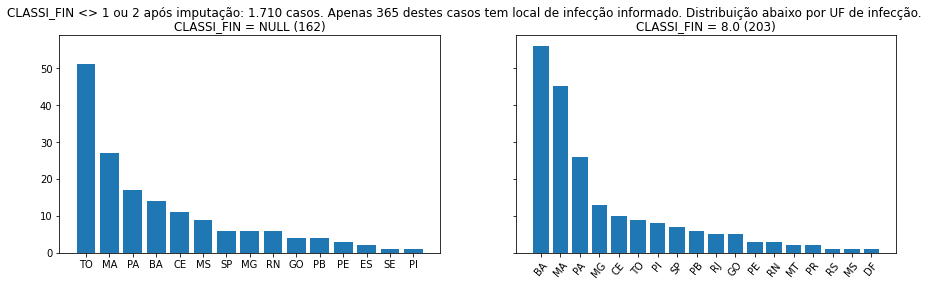

,BA,MA,PA,MG,CE,TO,PI,SP,PB,RJ,GO,PE,RN,MT,PR,RS,MS,DF,ES,SE
CLASSI_FIN_IGN,56.0,45.0,26.0,13.0,10.0,9.0,8.0,7.0,6.0,5.0,5.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
CLASSI_FIN_NULO,14.0,27.0,17.0,6.0,11.0,51.0,1.0,6.0,4.0,0.0,4.0,3.0,6.0,0.0,0.0,0.0,9.0,0.0,2.0,1.0
total,70.0,72.0,43.0,19.0,21.0,60.0,9.0,13.0,10.0,5.0,9.0,6.0,9.0,2.0,2.0,1.0,10.0,1.0,2.0,1.0


In [24]:
null = df.loc[
    df.CLASSI_FIN.isnull(), :
].groupby('CO_UF_INF')['CO_UF_INF'].count().sort_values(ascending=False)
null.name = 'CLASSI_FIN_NULO'

invalid = df.loc[
    df.CLASSI_FIN == 8, :
].groupby('CO_UF_INF')['CO_UF_INF'].count().sort_values(ascending=False)
invalid.name = 'CLASSI_FIN_IGN'

null.index = null.index.map(ufs)
invalid.index = invalid.index.map(ufs)

fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
axs[0].bar(null.index, null.values)
axs[0].set_title(f'CLASSI_FIN = NULL ({null.values.sum()})')
axs[1].bar(invalid.index, invalid.values)
axs[1].set_title(f'CLASSI_FIN = 8.0 ({invalid.values.sum()})')
plt.xticks(rotation=50)

fig.suptitle("""CLASSI_FIN <> 1 ou 2 após imputação: 1.710 casos. Apenas 365 destes casos tem local de infecção informado. Distribuição abaixo por UF de infecção.""")
plt.show()

st = pd.concat([invalid, null], axis=1).fillna(0)
st['total'] = st.CLASSI_FIN_IGN + st.CLASSI_FIN_NULO
display(st.T)

Após processo de conversão e união dos arquivos:
- `113.048` registros com 75 colunas cada
- O campo `CLASSI_FIN` determina se é caso confirmado ou descartado
    - `confirmados (1): 45.923`
    - `descartados (2): 59.331`
    - em branco e indefinido:
        - `em branco: 4.323`
        - `indefinido (8): 3.471`
        - total: 4.326 + 3.471 = 7.797
        - supondo que sejam casos confirmados mal cadastrados no sistema:
            - `93,7% não tem CO_MN_INF` (não daria para calcular alguns indicadores)
            - dos que tem CO_MN_INF, 51 registros são do Pará
                - 12 de Alenquer
                - 4 (Moju, Oeiras do Pará)
                - 2 (Marabá, São João do Araguaia, Tomé-Açú
                - 1 (Altamira, Belterra, Brejo Grande do Araguaia, Breu Branco, Breves, Cachoeira do Arari, Conceição do Araguaia, Curralinho, Dom Eliseu, Garrafão do Norte, Itupiranga, Limoeiro do Ajuru, Mãe do Rio, Maracanã, Muaná, Paragominas, Porto de Moz, Santa Maria das Barreiras, Santa Maria do Pará, Santana do Araguaia, São Félix do Xingu, São Miguel do Guamá, Tucumã, Ulianópolis, Uruará, Viseu
            - neste caso poderia alterar o entorno de Alenquer, que teria 12 casos a mais registrados. Mas os dados serão desconsiderados porque não há como saber se eles foram confirmados ou não.
   
- Foram considerados apenas os confirmados, `45.923 amostras`.
- Os casos com classificação em branco e valor 8 apresentam muita ausencia de informações.

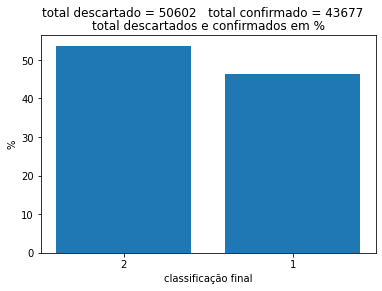

In [25]:
temp = df.loc[
    (df.CLASSI_FIN == 1.0) | (df.CLASSI_FIN == 2.0), :
].groupby('CLASSI_FIN')['CLASSI_FIN'].count().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(temp.index.astype(int).astype('string'), temp.values / temp.sum() * 100)
ax.set_title('total descartados e confirmados em %')
fig.suptitle(f'total descartado = {temp.iloc[0]}   total confirmado = {temp.iloc[1]}')

ax.set_ylabel('%')
ax.set_xlabel('classificação final')

plt.show()

In [26]:
confirmados = df.loc[(df.CLASSI_FIN == 1.0), :].copy()

`CO_MN_INF`, `CO_UF_INF`

Podemos corrigir algumas inconsistências nos locais de infecção considerando o campo `TPAUTOCTO`

Casos autóctones, alóctones ou indeterminados: `TPAUTOCTO`
Ex.:
- `TPAUTOCTO` é 1, `COMUNINF` e `COUFINF` são nulos: imputa com msm local de residência
- `TPAUTOCTO` é 2, mas `COMUNINF` e `COUFINF` são iguais aos de residência: 
    - poderia atualizar autoctonia para `1`, mas não é adequado fazer essa alteração. 
- `TPAUTOCTO` é nulo e `COMUNINF` e `COUFINF` são iguais aos de residência: imputa autoctonia com `1`

Não serão feitas essas alterações porque são arriscadas a princípio. Requer mais conhecimento da base e sistemas que a alimentam.

> Excluir registros que não possuem CO_UF_INF. `Impacto para dados do Pará: 1 amostra.`

In [27]:
print('\nTotal Brasil x Pará - CLASSI_FIN')
pd.concat([
    confirmados.CLASSI_FIN.value_counts(dropna=False).to_frame(name='Brasil'),
    confirmados.loc[confirmados.CO_MN_INF.astype('string').str.startswith('15'), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
], axis=1).fillna(0)


Total Brasil x Pará - CLASSI_FIN


,Brasil,Pará
1.0,43677,2109


In [28]:
#município de Curionópolis, 150277, notificou e não há campo de mun de infecão.
confirmados.loc[
    (confirmados.CO_MN_INF.isnull()) & (confirmados.CO_UF_INF == 15), 
    ['CO_UF_INF','CO_UF_RESI','CO_UF_NOT', 'CO_MN_INF','CO_MN_RESI','CO_MN_NOT', 'ANO', 'DT_NOT', 'TPAUTOCTO', 'DS_MUN_1', 'CO_UF_1']
]

,CO_UF_INF,CO_UF_RESI,CO_UF_NOT,CO_MN_INF,CO_MN_RESI,CO_MN_NOT,ANO,DT_NOT,TPAUTOCTO,DS_MUN_1,CO_UF_1
50507,15.0,15,15,NaN,150277,150277,2017,2017-08-28,2.0,NaN,NaN


In [29]:
# selecionando apenas os que tem município de infecção
# reduziu consideravelmente o conjunto porque a maioria dos casos descartados não tem este campo.

print(f"shape BR anterior: {confirmados.shape}")
confirmados = confirmados.loc[~(confirmados.CO_MN_INF.isnull()), :].copy()
print(f"shape BR após exclusão de amostras sem CO_MN_INF: {confirmados.shape}")

shape BR anterior: (43677, 75)
shape BR após exclusão de amostras sem CO_MN_INF: (39277, 75)


In [30]:
df.loc[(df.CLASSI_FIN == 1) & (df.ENTRADA == 1), 'ANO'].value_counts()

2017    4132
2018    3501
2011    3488
2014    3374
2009    3301
2013    3231
2010    3163
2008    3069
2012    2988
2015    2976
2007    2919
2016    2814
2019    2554
Name: ANO, dtype: int64

`CO_MN_RESI`, `CO_UF_RESI`


In [31]:
#verificando se ainda há nulos
(
    confirmados.loc[(confirmados.CO_MN_RESI.isnull()), :].shape,
    confirmados.loc[(confirmados.CO_MN_NOT.isnull()), :].shape,
    confirmados.loc[(confirmados.CO_MN_INF.isnull()), :].shape,
    confirmados.loc[(confirmados.CO_UF_RESI.isnull()), :].shape,
    confirmados.loc[(confirmados.CO_UF_NOT.isnull()), :].shape,
    confirmados.loc[(confirmados.CO_UF_INF.isnull()), :].shape  
)

((0, 75), (0, 75), (0, 75), (0, 75), (0, 75), (0, 75))

### corrigindo algumas inconsistências

- converter datas para datetime

In [32]:
# erro durante conversão para datetime (data incompleta). achar o index dos valores problemáticos e imputar.

datas = ['TRATAMENTO','DT_NOT', 'DT_PRI_SIN', 'DT_NASC', 'DT_INVEST', 'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DT_DESLC2', 'DT_DESLC3']

locs = {}
for col in datas:
    if (confirmados[col].str.len() < 10).any():
        idx = confirmados.loc[confirmados[col].str.len() < 10, :].index.values.tolist()
        for i in idx:
            locs.update({i: col})

display(confirmados.loc[locs.keys(), datas])

for k,v in locs.items():
    confirmados.loc[k, v] = np.nan
    
display(confirmados.loc[locs.keys(), datas])

# converte para datetime
confirmados[datas] = confirmados[datas].apply(lambda x: pd.to_datetime(x), axis=1)

,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
3556,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,211-10-10,2012-01-09
32177,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,205-06-01,NaN


,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
3556,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,NaN,2012-01-09
32177,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,NaN,NaN


In [33]:
print(
    ('SEMANA_NOT', 'len <> de 6 dígitos' if (confirmados.SEMANA_NOT.astype('string').str.len() != 6).any() else 'Passed'),
    ('SEMANA_PRI_SIN', 'len <> de 6 dígitos' if (confirmados.SEMANA_PRI_SIN.astype('string').str.len() != 6).any() else 'Passed'),
    ('ANO', 'len <> de 4 dígitos' if (confirmados.ANO.astype('string').str.len() != 4).any() else 'Passed'),
    ('CO_MN_NOT', 'len <> de 6 dígitos' if (confirmados.CO_MN_NOT.astype('string').str.len() != 6).any() else 'Passed'),
    ('CO_MN_RESI', 'len <> de 6 dígitos' if (confirmados.CO_MN_RESI.astype('string').str.len() != 6).any() else 'Passed'),
    ('CO_MN_INF', 'len <> de 6 dígitos' if (confirmados.CO_MN_INF.astype('string').str.len() != 6).any() else 'Passed'),
    sep='\n'
)  

('SEMANA_NOT', 'len <> de 6 dígitos')
('SEMANA_PRI_SIN', 'len <> de 6 dígitos')
('ANO', 'Passed')
('CO_MN_NOT', 'Passed')
('CO_MN_RESI', 'Passed')
('CO_MN_INF', 'len <> de 6 dígitos')


inconsistência simples de resolver, algumas semanas estão apenas com o final do ano concatenado à semana epidemiológica. Basta concatenar o ano com o final da coluna `SEMANA_NOT` 

In [34]:
c = (confirmados.SEMANA_NOT.astype('string').str.len() != 6) | (confirmados.SEMANA_PRI_SIN.astype('string').str.len() != 6)
display(confirmados.loc[c, ['DT_NOT','SEMANA_NOT', 'DT_PRI_SIN','SEMANA_PRI_SIN']].head())

,DT_NOT,SEMANA_NOT,DT_PRI_SIN,SEMANA_PRI_SIN
1011,2011-01-18,1103,2010-10-18,1042
1453,2014-04-07,1415,2014-04-01,1414
1487,2014-04-25,1417,2014-01-25,1404
3196,2012-09-03,1236,2012-08-24,1234
7167,2019-10-17,1942,2019-10-12,1941


In [35]:
#O correto será calcular a semana de notificação e primeiro sintomas usando a data,
#porque às vezes a última semana do ano pega o início do próximo e vice-versa.
confirmados.SEMANA_PRI_SIN = (
    confirmados.DT_PRI_SIN.dt.year.astype('string') + 
    confirmados.SEMANA_PRI_SIN.apply(lambda x: str(x)[-2:])
)
confirmados.SEMANA_NOT = (
    confirmados.DT_NOT.dt.year.astype('string') + 
    confirmados.SEMANA_NOT.apply(lambda x: str(x)[-2:])
)

In [36]:
print(
    ('total nulos', confirmados.CO_MN_INF.isnull().sum()),
    ('tipo', confirmados.CO_MN_INF.dtype)
)
confirmados.CO_MN_INF = confirmados.CO_MN_INF.astype(int).astype('string')

('total nulos', 0) ('tipo', dtype('float64'))


### criando a coluna idade 

- idade na data de notificação 

In [37]:
confirmados['IDADE'] = np.round( (confirmados.DT_NOT - confirmados.DT_NASC) / np.timedelta64('1', 'Y'), 6)

In [38]:
confirmados.loc[:, ['DT_NASC', 'DT_NOT']].head()

,DT_NASC,DT_NOT
16,2012-09-17,2012-10-30
17,2011-10-05,2012-11-15
25,1982-12-08,2012-10-26
28,1989-06-01,2012-06-01
31,2009-05-01,2012-08-14


- algumas idades ficaram nulas pela falta de uma data ou outra, possivelmente a data de nascimento. Entretanto, essas mesmas amostras com essa falta possuem o campo `NU_IDADE_N`, que é preenchido manualmente por quem faz a notificação. Podemos extrair a idade desse campo e preencher as 373 amostras que ficaram sem `IDADE`. 
    - se começar com 1: idade é dada em **horas**
    - se começar com 2: idade é dada em **dias**
    - se começar com 3: idade é dada em **meses**
    - se começar com 4: idade é dada em **anos**

In [39]:
for index, row in confirmados.loc[confirmados.IDADE.isnull(), ['NU_IDADE_N', 'IDADE']].iterrows():
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('4'):
        confirmados.loc[index, 'IDADE'] = int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:])
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('3'):
        confirmados.loc[index, 'IDADE'] = np.round(int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:]) / 12, 6)
    if str(confirmados.loc[index, 'NU_IDADE_N']).startswith('2'):
        confirmados.loc[index, 'IDADE'] = np.round(int(str(confirmados.loc[index, 'NU_IDADE_N'])[1:]) / 365, 6)

In [40]:
confirmados.loc[confirmados.IDADE.isnull(), 'NU_IDADE_N']

Series([], Name: NU_IDADE_N, dtype: int64)

### - excluindo municípios ignorados - terminados em `0000`, cada estado tem um.
Nenhum do Pará.

In [41]:
confirmados.loc[
    confirmados.CO_MN_INF.astype('string').str.endswith('0000'), 
    'CO_UF_INF'
].value_counts().to_frame('municípios ignorados: xx0000').T

,29.0,31.0,17.0,21.0,51.0,23.0,25.0,33.0,41.0,52.0,22.0,35.0
municípios ignorados: xx0000,7,6,4,4,2,2,2,1,1,1,1,1


In [42]:
# municipios ignorados: um para cada UF, totalizando 32, termina com '0000'
mask = (
    confirmados.CO_MN_INF.astype('string').str.endswith('0000') | 
    confirmados.CO_MN_RESI.astype('string').str.endswith('0000')
)
mask.sum()

32

In [43]:
# municipios ignorados: um para cada UF, totalizando 32, termina com '0000'
confirmados.drop(confirmados.index[mask], axis=0, inplace=True)

### Preparando para exportar

## Excluindo colunas desnecessárias

In [44]:
confirmados.drop(
    ['CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'NDUPLIC_N', 
     'TP_NOT', 'ID_REGIONA', 'ID_RG_RESI', 'ID_AGRAVO', 'CLASSI_FIN'
    ],
    axis=1,
    inplace=True
)

In [45]:
confirmados.select_dtypes('float').columns

Index(['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3',
       'IDADE'],
      dtype='object')

In [46]:
#exceto peso e idade, tudo pro tipo int
cols = ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'DOSE', 
       'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3']
confirmados[cols] = confirmados[cols].astype(np.float).astype("Int32")

In [47]:
confirmados.to_csv('../data/interim/leivis/interim_leivis_limpos.csv',index=False)